In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

---------------------------------------------------------------- Cleaning Malnutrition Dataset ----------------------------------------------------------<br>
Importing raw csv files

In [112]:
df = pd.read_csv('C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Raw/Malnutrition_raw.csv', encoding= 'latin-1')

replacing missing values with NaN

In [113]:
df = df.replace('..', np.nan)

renaming the column names

In [114]:
df.rename(columns = {'Country Name':'Country', '2003 [YR2003]':2003, '2004 [YR2004]':2004, '2005 [YR2005]':2005, '2006 [YR2006]':2006, '2007 [YR2007]':2007, '2008 [YR2008]':2008, '2009 [YR2009]':2009, '2010 [YR2010]':2010, '2011 [YR2011]':2011, '2012 [YR2012]':2012, '2013 [YR2013]':2013, '2014 [YR2014]':2014, '2015 [YR2015]':2015, '2016 [YR2016]':2016, '2017 [YR2017]':2017, '2018 [YR2018]':2018, '2019 [YR2019]':2019, '2020 [YR2020]':2020, '2021 [YR2021]':2021, '2022 [YR2022]':2022}, inplace = True)

converting string to numeric values

In [115]:
year_columns = df.columns.tolist()[4:]  # selecting the year columns
for column in year_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df2 = df.head(270) # selecting the top 270 rows ignoring the metadata

In [116]:
df2.iloc[:, 4:] = df2.iloc[:, 4:].interpolate(method='linear', axis=1, limit_direction='both') # Interpolating the data to replace the NaN values
df3 = df2[['Country', 'Series Name', 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]]   # Creating a new dataframe with required columns
df3 = df3.drop(df3[df3['Country'] == 'Mauritius'].index)    # Removing rows with improper interpolation/data
df3 = df3.drop(df3[df3['Country'] == 'Cabo Verde'].index)   # Removing rows with improper interpolation/data

Creating new data frames (stunting, wasting and Undernutrition) and resetting their index

In [117]:
st = df3.loc[df3['Series Name'] == 'Prevalence of stunting, height for age (% of children under 5)']
st.reset_index(inplace=True)
ws = df3.loc[df3['Series Name'] == 'Prevalence of wasting, weight for height (% of children under 5)']
ws.reset_index(inplace=True)
un = df3.loc[df3['Series Name'] == 'Prevalence of underweight, weight for age (% of children under 5)']
un.reset_index(inplace=True)

Creating malnutrition index dataframe and storing the mean of stunting,wasting,underweight indices in it

In [118]:
mln = pd.DataFrame()
mln['Country'] = st['Country']
for i in range(2011,2020):
    mln[i] = (st[i]+ws[i]+un[i])/3
mln.drop

<bound method DataFrame.drop of                      Country       2011       2012       2013       2014  \
0                    Algeria   6.494444   6.266667   6.095238   5.923810   
1                     Angola  19.016667  19.387500  19.758333  20.129167   
2                      Benin  19.366667  19.188889  19.011111  18.833333   
3                   Botswana  16.000000  16.000000  16.000000  16.000000   
4               Burkina Faso  23.366667  22.600000  20.100000  19.166667   
5                    Burundi  30.766667  30.633333  30.500000  30.366667   
6                   Cameroon  17.833333  17.633333  17.433333  17.233333   
7   Central African Republic  23.866667  23.866667  22.633333  21.400000   
8                       Chad  28.246667  28.060000  27.873333  27.686667   
9                    Comoros  19.733333  19.733333  19.733333  19.733333   
10               Congo, Rep.  14.066667  14.011111  13.955556  13.900000   
11          Congo, Dem. Rep.  25.155556  24.944444  24.7

Storing the cleaned malnutrition index dataframe into a new csv file

In [119]:
file_path = 'C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Cleaned/Malnutrition_index_cleaned.csv'
mln.to_csv(file_path, encoding= 'latin-1')

---------------------------------------------------------------------- Cleaning GDP Dataset -------------------------------------------------------------------------------

Importing raw csv file

In [120]:
df = pd.read_csv('C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Raw/GDP_raw.csv', encoding= 'latin-1')

In [121]:
gdp = df[['Country Name', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]','2018 [YR2018]', '2019 [YR2019]']]   # Selecting required columns
gdp.rename(columns = {'Country Name':'Country', '2015 [YR2015]': 2015, '2016 [YR2016]': 2016, '2017 [YR2017]': 2017, '2018 [YR2018]': 2018, '2019 [YR2019]':2019}, inplace = True)  # Renaming columns
gdp = gdp.replace('..', np.nan) # filling null values with NaN

C:\Users\nithi\AppData\Local\Temp\ipykernel_66760\4111096645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp.rename(columns = {'Country Name':'Country', '2015 [YR2015]': 2015, '2016 [YR2016]': 2016, '2017 [YR2017]': 2017, '2018 [YR2018]': 2018, '2019 [YR2019]':2019}, inplace = True)  # Renaming columns


In [122]:
gdp.dropna(inplace=True)   # Droping rows with null values as in this data there are either countries with full data or no data
for i in range(2015,2020):  # converting string to numeric values
    gdp[i] = pd.to_numeric(gdp[i], errors='coerce')
print(gdp)

                     Country          2015          2016          2017  \
0                    Algeria  12071.814181  11685.451418  11809.483033   
1                     Angola   7274.090475   7027.146634   7216.061373   
2                      Benin   2792.609645   2901.264671   2933.837384   
3                   Botswana  13420.506601  15277.042322  14656.772989   
4               Burkina Faso   1657.916107   1833.433053   1978.155012   
5                 Cabo Verde   6242.705232   6689.804951   7130.854152   
6                    Burundi    797.050114    766.587221    750.787616   
7                   Cameroon   3437.789826   3559.135120   3691.094724   
8   Central African Republic    733.749581    787.471168    839.600009   
9                       Chad   1816.288184   1660.984878   1579.760600   
10                   Comoros   2884.774852   3053.302585   3240.179170   
11               Congo, Rep.   4448.916586   3687.580949   4073.926085   
12          Congo, Dem. Rep.    877.68

saving the cleaned dataset into a new csv file

In [123]:
file_path = 'C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Cleaned/GDP_cleaned.csv'
gdp.to_csv(file_path, encoding= 'latin-1')

--------------------------------------------------------------------- Cleaning Cost of Healthy Diet Dataset -------------------------------------------------------------------

Importing the raw csv file

In [124]:
df = pd.read_csv('C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Raw/cohd_raw.csv', encoding= 'latin-1')
df_new = df[['Country Name', 'Time', 'Cost of a healthy diet [CoHD]', 'Percent of the population who cannot afford a healthy diet [CoHD_headcount]']]   # selecting required columns
df_new.rename(columns = {'Country Name':'Country', 'Time': 'Year', 'Percent of the population who cannot afford a healthy diet [CoHD_headcount]':'% who cannot afford CoHD'}, inplace = True)  # renaming columns

C:\Users\nithi\AppData\Local\Temp\ipykernel_66760\1665209200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns = {'Country Name':'Country', 'Time': 'Year', 'Percent of the population who cannot afford a healthy diet [CoHD_headcount]':'% who cannot afford CoHD'}, inplace = True)  # renaming columns


Creating dataframes for different years

In [125]:
cohd_2017 = df_new.loc[df_new['Year'] == 2017]
cohd_2018 = df_new.loc[df_new['Year'] == 2018]
cohd_2019 = df_new.loc[df_new['Year'] == 2019]
cohd_2020 = df_new.loc[df_new['Year'] == 2020]
cohd_2021 = df_new.loc[df_new['Year'] == 2021]

In [126]:
l = [cohd_2017, cohd_2018, cohd_2019, cohd_2020, cohd_2021]

Here, enumerate() is used to get both the index and the element in the loop. Then, modifications are performed directly on the DataFrame referenced by l[idx], <br>
nsuring changes are made to the original DataFrames within the list. Finally, the modified DataFrame is assigned back to the list at the corresponding index (l[idx] = i).

In [127]:
for idx, i in enumerate(l):
    i.replace('..', np.nan, inplace=True)
    i['Cost of a healthy diet [CoHD]'] = pd.to_numeric(i['Cost of a healthy diet [CoHD]'], errors='coerce') # converting string to numeric values
    i['% who cannot afford CoHD'] = pd.to_numeric(i['% who cannot afford CoHD'], errors='coerce')  # converting string to numeric values
    df_name = f'cohd_{idx+2017}'  # naming columns like - cohd_2017, cohd_2018, ...
    i.rename(columns={'Cost of a healthy diet [CoHD]': df_name, '% who cannot afford CoHD': '% who cannot afford '+ df_name}, inplace=True)
    i.dropna(inplace=True)  # dropping NaN valued rows
    i.index = range(1, len(i) + 1)
    i.drop(columns='Year', inplace=True)
    l[idx] = i  # Assign the modified DataFrame back to the list

C:\Users\nithi\AppData\Local\Temp\ipykernel_66760\980646191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.replace('..', np.nan, inplace=True)
C:\Users\nithi\AppData\Local\Temp\ipykernel_66760\980646191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['Cost of a healthy diet [CoHD]'] = pd.to_numeric(i['Cost of a healthy diet [CoHD]'], errors='coerce') # converting string to numeric values
C:\Users\nithi\AppData\Local\Temp\ipykernel_66760\980646191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Merging the dataframes into a single dataframe

In [128]:
cohd = cohd_2017.merge(cohd_2018, on="Country").merge(cohd_2019, on ="Country").merge(cohd_2020, on="Country").merge(cohd_2021, on="Country")
print(cohd)

                     Country  cohd_2017  % who cannot afford cohd_2017  \
0                    Algeria      3.763                           32.5   
1                     Angola      4.327                           81.4   
2                      Benin      3.550                           90.6   
3                   Botswana      3.622                           63.2   
4               Burkina Faso      3.173                           83.0   
5                    Burundi      2.988                           95.8   
6                 Cabo Verde      3.358                           44.5   
7                   Cameroon      2.616                           59.2   
8   Central African Republic      3.423                           94.6   
9                       Chad      2.831                           82.7   
10               Congo, Rep.      3.343                           88.6   
11          Congo, Dem. Rep.      2.921                           94.2   
12             Côte d'Ivoire      3.27

Saving the cleaned dataframe

In [129]:
file_path = 'C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Cleaned/cohd_cleaned.csv'
cohd.to_csv(file_path, encoding= 'latin-1')

-------------------------------------------------- Visualize Hypothesis I : % who cannot afford healthy diet vs GDP ---------------------------------------------------------------

Importing cleaned dataset

In [130]:
gdp = pd.read_csv('C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Cleaned/GDP_cleaned.csv', encoding= 'latin-1')
print(gdp)

    Unnamed: 0                   Country          2015          2016  \
0            0                   Algeria  12071.814181  11685.451418   
1            1                    Angola   7274.090475   7027.146634   
2            2                     Benin   2792.609645   2901.264671   
3            3                  Botswana  13420.506601  15277.042322   
4            4              Burkina Faso   1657.916107   1833.433053   
5            5                Cabo Verde   6242.705232   6689.804951   
6            6                   Burundi    797.050114    766.587221   
7            7                  Cameroon   3437.789826   3559.135120   
8            8  Central African Republic    733.749581    787.471168   
9            9                      Chad   1816.288184   1660.984878   
10          10                   Comoros   2884.774852   3053.302585   
11          11               Congo, Rep.   4448.916586   3687.580949   
12          12          Congo, Dem. Rep.    877.680835    932.40

Merging GDP and cohd datasets

In [131]:
merged_1 = cohd.merge(gdp, on = 'Country')  
x = merged_1['% who cannot afford cohd_2019'] # x - % who cannot afford cohd 2019
y = merged_1['2019']  # y - GDP 2019

Determining the strength and significance of relation between cohd and GDP per capita

In [132]:
corr_pearson, p_value = pearsonr(x, y)
corr_spearman, p_value = spearmanr(x,y)
print(corr_spearman, p_value)
print(corr_pearson, p_value)

-0.7445568039876985 4.533028284291682e-09
-0.7915502979192163 4.533028284291682e-09


Visualizing Hypothesis I (% who cannot afford healthy diet vs GDP)

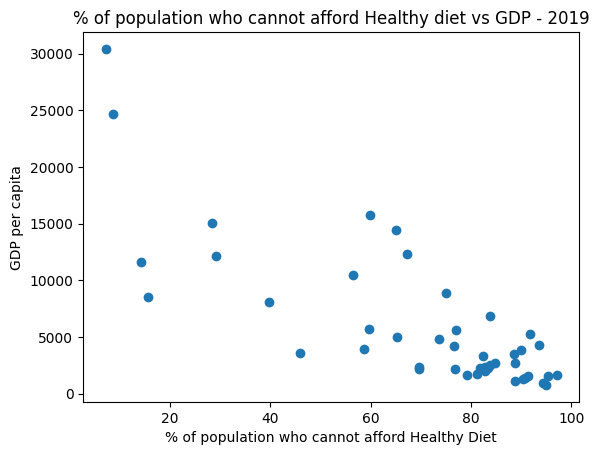

In [133]:
plt.scatter(x, y)
plt.title('% of population who cannot afford Healthy diet vs GDP - 2019')  # Optional: set plot titl
plt.xlabel('% of population who cannot afford Healthy Diet')  
plt.ylabel('GDP per capita')
plt.show()

Save cohd/gdp dataframe in a new csv file for hypothesis II (Food prices vs Malnutrition index)

In [134]:
merged = cohd.merge(gdp, on="Country")
print(merged)

                     Country  cohd_2017  % who cannot afford cohd_2017  \
0                    Algeria      3.763                           32.5   
1                     Angola      4.327                           81.4   
2                      Benin      3.550                           90.6   
3                   Botswana      3.622                           63.2   
4               Burkina Faso      3.173                           83.0   
5                    Burundi      2.988                           95.8   
6                 Cabo Verde      3.358                           44.5   
7                   Cameroon      2.616                           59.2   
8   Central African Republic      3.423                           94.6   
9                       Chad      2.831                           82.7   
10               Congo, Rep.      3.343                           88.6   
11          Congo, Dem. Rep.      2.921                           94.2   
12                  Djibouti      2.79

Creating empty dataframe to store required values

In [135]:
cohd_gdp = pd.DataFrame()

Dividing CoHD with GDP per capita to account for purchasing power parity

In [136]:
cohd_gdp['Country'] = merged['Country']
cohd_gdp['CoHD/GDP (2017)'] = merged['cohd_2017']/merged['2017']*10000
cohd_gdp['CoHD/GDP (2018)'] = merged['cohd_2018']/merged['2018']*10000
cohd_gdp['CoHD/GDP (2019)'] = merged['cohd_2019']/merged['2019']*10000

Saving the cohd/gdp values into a new csv file to visualize with malnutrition index in plot_cohd_mln.py

In [137]:
file_path = 'C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Cleaned/cohd_gdp_cleaned.csv'
cohd_gdp.to_csv(file_path, encoding= 'latin-1')

------------------------------------------------ Visualize Hypothesis II : Food prices vs Malnutrition - 2019 -----------------------------------------------------------

Importig data from cleaned csv files

In [138]:
mln = pd.read_csv('C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Cleaned/Malnutrition_index_cleaned.csv', encoding='latin-1')
cohd_gdp = pd.read_csv('C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Cleaned/cohd_gdp_cleaned.csv', encoding='latin-1')

Merging Data sets

In [139]:
merged = cohd_gdp.merge(mln, on='Country')
merged = merged.drop(merged[merged['Country'] == 'Sudan'].index)       # Removing rows with improper interpolation
merged = merged.drop(merged[merged['Country'] == 'Liberia'].index)     # Removing rows with improper interpolation
merged = merged.drop(merged[merged['Country'] == 'Central African Republic'].index)         # Removing rows with improper interpolation
print(merged)

    Unnamed: 0_x                Country  CoHD/GDP (2017)  CoHD/GDP (2018)  \
0              0                Algeria         3.186422         3.182938   
1              1                 Angola         5.996346         6.094587   
2              2                  Benin        12.100193        11.788305   
3              3               Botswana         2.471212         2.333280   
4              4           Burkina Faso        16.040199        15.691271   
5              5                Burundi        39.798206        36.979935   
6              7               Cameroon         7.087328         7.022074   
8              9                   Chad        17.920437        17.081660   
9             10            Congo, Rep.         8.205844         8.729988   
10            11       Congo, Dem. Rep.        28.538215        24.034724   
11            12               Djibouti         6.283016         6.098249   
12            13       Egypt, Arab Rep.         3.144155         3.013793   

In [140]:
x = merged['CoHD/GDP (2019)'] # Assigning x to cohd/gdp 2019
y = merged['2019']  # # Assigning y to malnutrition 2019

Determining the strength and significance of relation between Food prices(cohd/gdp per capita) and Malnutrition Index

In [141]:
corr_pearson, p_value = pearsonr(x, y)
corr_spearman, p_value = spearmanr(x,y)
print(corr_spearman, p_value)
print(corr_pearson, p_value)

0.725891181988743 1.1556709543100494e-07
0.7493436360259338 1.1556709543100494e-07


Visualizing Hypothesis II (Food prices vs Malnutrition - 2019)

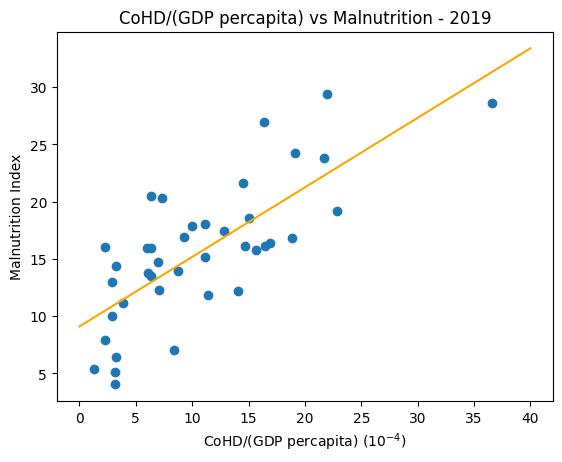

In [142]:
plt.scatter(x,y)
plt.title('CoHD/(GDP percapita) vs Malnutrition - 2019')  # Optional: set plot titl
plt.xlabel('CoHD/(GDP percapita) $(10^{-4})$')  
plt.ylabel('Malnutrition Index')
# Least square fit line
model1 = np.poly1d(np.polyfit(x, y, 1))
polyline = np.linspace(0, 40)
plt.plot(polyline, model1(polyline), color='orange')
plt.show()

----------------------------------------- Visualize Hypothesis III : Immunization rates vs Malnutrition Index ------------------------------------------------

read the csv files

In [143]:
df = pd.read_csv('C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Raw/Immunization_raw.csv', encoding='latin-1')
df = df.replace('..', np.nan)  # replacing missing values with NaN
# renaming column names
df.rename(columns = {'Country Name':'Country', '2003 [YR2003]':2003, '2004 [YR2004]':2004, '2005 [YR2005]':2005, '2006 [YR2006]':2006, '2007 [YR2007]':2007, '2008 [YR2008]':2008, '2009 [YR2009]':2009, '2010 [YR2010]':2010, '2011 [YR2011]':2011, '2012 [YR2012]':2012, '2013 [YR2013]':2013, '2014 [YR2014]':2014, '2015 [YR2015]':2015, '2016 [YR2016]':2016, '2017 [YR2017]':2017, '2018 [YR2018]':2018, '2019 [YR2019]':2019, '2020 [YR2020]':2020, '2021 [YR2021]':2021, '2022 [YR2022]':2022}, inplace = True)

selecting the year columns

In [144]:
year_columns = df.columns.tolist()[4:]

converting to numeric data

In [145]:
for column in year_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df2 = df

Interpolating and dropping columns with NaN values

In [146]:
df2.iloc[:, 4:] = df2.iloc[:, 4:].interpolate(method='linear', axis=1)
df_3 = df2[['Country', 'Series Name', 2011, 2013, 2015, 2017, 2019]]
df_3.dropna(inplace=True) # Dropping rows with NaN values after interpolation
print(df3)

      Country                                        Series Name       2011  \
0     Algeria  Prevalence of stunting, height for age (% of c...  12.316667   
1     Algeria  Prevalence of severe wasting, weight for heigh...   1.450000   
2     Algeria  Prevalence of wasting, weight for height (% of...   4.100000   
3     Algeria  Prevalence of underweight, weight for age (% o...   3.066667   
4     Algeria   Prevalence of undernourishment (% of population)   3.800000   
..        ...                                                ...        ...   
265  Zimbabwe  Prevalence of stunting, height for age (% of c...  31.050000   
266  Zimbabwe  Prevalence of severe wasting, weight for heigh...   0.775000   
267  Zimbabwe  Prevalence of wasting, weight for height (% of...   3.200000   
268  Zimbabwe  Prevalence of underweight, weight for age (% o...  10.450000   
269  Zimbabwe   Prevalence of undernourishment (% of population)        NaN   

      2012       2013       2014       2015       2

C:\Users\nithi\AppData\Local\Temp\ipykernel_66760\906078370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.dropna(inplace=True) # Dropping rows with NaN values after interpolation


In [147]:
mln = pd.read_csv('C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Cleaned/Malnutrition_index_cleaned.csv', encoding='latin-1')

Merging datasets to perform and storing the data in new dataframe - countries

In [148]:
countries = pd.DataFrame()
countries['Country'] = mln['Country']
df3 = df_3.merge(countries, on='Country')
df3 = df3.drop(df3[df3['Country'] == 'Eritrea'].index)    # Removing rows with improper interpolation
df3 = df3.drop(df3[df3['Country'] == 'Sudan'].index)      # Removing rows with improper interpolation
df3 = df3.drop(df3[df3['Country'] == 'Niger'].index)      # Removing rows with improper interpolation
df3 = df3.drop(df3[df3['Country'] == 'Burundi'].index)    # Removing rows with improper interpolation

Creating individual dataframes for different vaccines

In [149]:
msls = df3.loc[df3['Series Name'] == 'Immunization, measles (% of children ages 12-23 months)']
msls.reset_index(inplace=True, drop=True)
dpt = df3.loc[df3['Series Name'] == 'Immunization, DPT (% of children ages 12-23 months)']
dpt.reset_index(inplace=True, drop=True)
pol = df3.loc[df3['Series Name'] == 'Immunization, Pol3 (% of one-year-old children)']
pol.reset_index(inplace=True, drop=True)
bcg = df3.loc[df3['Series Name'] == 'Immunization, BCG (% of one-year-old children)']
bcg.reset_index(inplace=True, drop=True)
print(msls)

                     Country  \
0                    Algeria   
1                      Benin   
2               Burkina Faso   
3                   Cameroon   
4   Central African Republic   
5                       Chad   
6                Congo, Rep.   
7           Congo, Dem. Rep.   
8              Cote d'Ivoire   
9                   Djibouti   
10          Egypt, Arab Rep.   
11         Equatorial Guinea   
12                  Eswatini   
13                  Ethiopia   
14               Gambia, The   
15                     Ghana   
16                    Guinea   
17             Guinea-Bissau   
18                     Kenya   
19                   Lesotho   
20                   Liberia   
21                Madagascar   
22                    Malawi   
23                      Mali   
24                Mauritania   
25                   Morocco   
26                Mozambique   
27                   Namibia   
28                   Nigeria   
29                    Rwanda   
30     S

Filling the empty dataframe - countries

In [150]:
countries['Country'] = msls['Country']

merging dataframes for visualizing

In [151]:
mln_i = countries.merge(mln, on= 'Country')
print(mln_i)

                     Country  Unnamed: 0       2011       2012       2013  \
0                    Algeria           0   6.494444   6.266667   6.095238   
1                      Benin           2  19.366667  19.188889  19.011111   
2               Burkina Faso           4  23.366667  22.600000  20.100000   
3                   Cameroon           6  17.833333  17.633333  17.433333   
4   Central African Republic           7  23.866667  23.866667  22.633333   
5                       Chad           8  28.246667  28.060000  27.873333   
6                Congo, Rep.          10  14.066667  14.011111  13.955556   
7           Congo, Dem. Rep.          11  25.155556  24.944444  24.733333   
8              Cote d'Ivoire          12  19.626667  17.733333  16.675000   
9                   Djibouti          13  21.066667  21.850000  22.633333   
10          Egypt, Arab Rep.          14  14.033333  13.666667  13.300000   
11         Equatorial Guinea          15  11.633333  11.633333  11.633333   

X and Y 

In [152]:
x = (bcg[2019] + pol[2019] + msls[2019] + dpt[2019])/4  # Assigning x - mean of vaccine rates of bcg,pol,measles,dpt 2019
y = mln_i['2019']  # Assigning y - malnutriition index 2019

Determining the strength and significance of relation between Food prices(cohd/gdp per capita) and Malnutrition Index

In [153]:
corr_pearson, p_value = pearsonr(x, y)
corr_spearman, p_value = spearmanr(x,y)
print(corr_spearman, p_value)
print(corr_pearson, p_value)

-0.5899245504647171 1.0217161599850579e-05
-0.6527417409097417 1.0217161599850579e-05


Data visualization

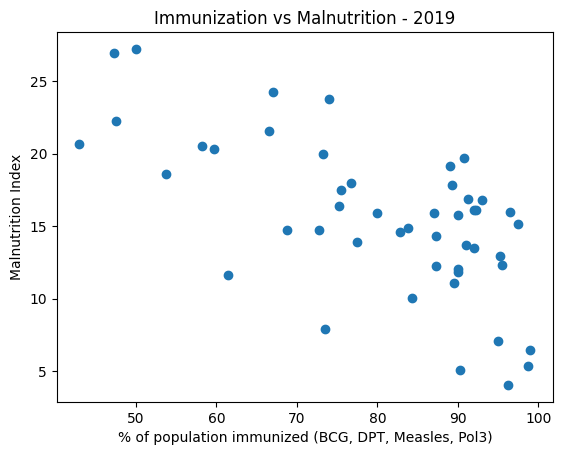

In [154]:
plt.scatter(x, y)
plt.title('Immunization vs Malnutrition - 2019')  
plt.xlabel('% of population immunized (BCG, DPT, Measles, Pol3)')  
plt.ylabel('Malnutrition Index')
plt.show() # Show the plot

------------------------------------- Visualize Hypothesis IV : Maternal Education vs Malnutrition Index 2019 ----------------------------------

Importing raw csv file

In [155]:
df1=pd.read_csv("C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Raw/Maternaleducationlevels_raw.csv",encoding='latin-1').head(325)   

Selecting rows within interest i.e., Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)

In [156]:
df2 = df1.loc[df1['Series Name']=='Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)',['Country Name','2011 [YR2011]','2013 [YR2013]','2015 [YR2015]','2017 [YR2017]','2019 [YR2019]']]

Selecting required columns (Years)

In [157]:
df2[['2011 [YR2011]','2013 [YR2013]','2015 [YR2015]','2017 [YR2017]','2019 [YR2019]']]=df2[['2011 [YR2011]','2013 [YR2013]','2015 [YR2015]','2017 [YR2017]','2019 [YR2019]']].apply(pd.to_numeric,errors='coerce')

In [158]:
df2.replace('..',np.nan,inplace=True) # replacing missing values with NaN
df2.iloc[:,1:]=df2.iloc[:,1:].interpolate(method='linear',axis=1,limit_direction='both') # Interpolating to replace the NaN values
df2.dropna(inplace=True) # removing the rows with NaN values after interpolation
df2.reset_index(inplace=True,drop=True)  # resetting index
print(df2)

                Country Name  2011 [YR2011]  2013 [YR2013]  2015 [YR2015]  \
0                    Algeria      24.826941      24.826941      24.826941   
1                     Angola      12.242710      12.242710      12.242710   
2                      Benin       2.107650       2.107650       2.107650   
3               Burkina Faso       4.994060       4.994060       4.994060   
4                    Burundi       3.837770       3.837770       3.837770   
5                 Cabo Verde      19.808149      19.808149      19.808149   
6   Central African Republic       3.260210       3.260210       3.260210   
7                       Chad       1.840520       1.840520       1.840520   
8                Congo, Rep.      13.657390      13.657390      13.657390   
9           Congo, Dem. Rep.      10.260200      10.260200      10.260200   
10                  Djibouti       9.735710       9.735710       9.735710   
11          Egypt, Arab Rep.      67.458900      67.458900      67.458900   

Importing cleaned Malnutrition data

In [159]:
mln = pd.read_csv('C:/Users/nithi/Desktop/Project/Tackling_Malnutrition_in_Africa/Datasets/Cleaned/Malnutrition_index_cleaned.csv', encoding='latin-1')

creating a new dataframe

In [160]:
countries = pd.DataFrame()

Storing required columns in the new dataframe and merging dataframes to make sure no of rows are equal in both dataframes

In [161]:
countries['Country'] = df2['Country Name']
mln_e = countries.merge(mln, on= 'Country')
countries['Country Name'] = mln_e['Country']
df2_e = countries.merge(df2, on= 'Country Name')
print(mln_e)

                     Country  Unnamed: 0       2011       2012       2013  \
0                    Algeria           0   6.494444   6.266667   6.095238   
1                     Angola           1  19.016667  19.387500  19.758333   
2                      Benin           2  19.366667  19.188889  19.011111   
3               Burkina Faso           4  23.366667  22.600000  20.100000   
4                    Burundi           5  30.766667  30.633333  30.500000   
5   Central African Republic           7  23.866667  23.866667  22.633333   
6                       Chad           8  28.246667  28.060000  27.873333   
7                Congo, Rep.          10  14.066667  14.011111  13.955556   
8           Congo, Dem. Rep.          11  25.155556  24.944444  24.733333   
9                   Djibouti          13  21.066667  21.850000  22.633333   
10          Egypt, Arab Rep.          14  14.033333  13.666667  13.300000   
11                  Ethiopia          18  27.800000  26.944444  26.088889   

Assigning X and Y 

In [162]:
x = df2_e['2019 [YR2019]'] # maternal education levels 2019
y = mln_e['2019'] # malnutrition index 2019

Determining the strength and significance of relation between Food prices(cohd/gdp per capita) and Malnutrition Index

In [163]:
corr_pearson, p_value = pearsonr(x, y)
corr_spearman, p_value = spearmanr(x,y)
print(corr_spearman, p_value)
print(corr_pearson, p_value)

-0.5924786324786324 0.0014268540325279744
-0.4414082692612158 0.0014268540325279744


Visualizing : Maternal Education vs Malnutrition Index

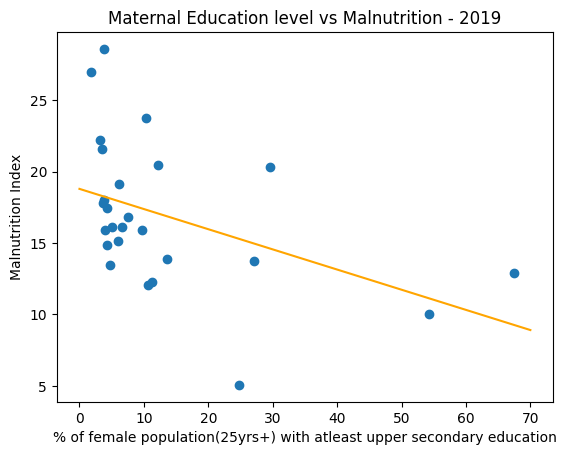

In [164]:
plt.scatter(x,y)
plt.title('Maternal Education level vs Malnutrition - 2019')  
plt.xlabel('% of female population(25yrs+) with atleast upper secondary education')  
plt.ylabel('Malnutrition Index')
# Least square fit line (optional)
model1 = np.poly1d(np.polyfit(x, y, 1))
polyline = np.linspace(0, 70)
plt.plot(polyline, model1(polyline), color='orange')
plt.show()